In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the dataframe
data=pd.read_csv(r'C:\Users\ADMIN\Desktop\Datasets\Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Data Sanity Checks

In [3]:
data.shape

(10000, 6)

In [4]:
data.duplicated().sum()

127

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [8]:
data.describe(include=object).T

,count,unique,top,freq
Extracurricular Activities,10000,2,No,5052


## Data Cleaning

In [9]:
#Removing the duplicate records
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Data Analysis

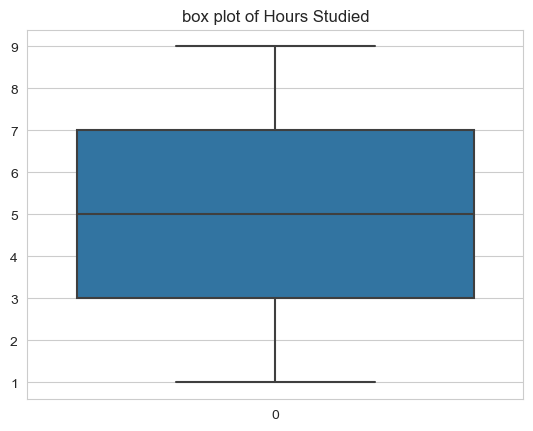

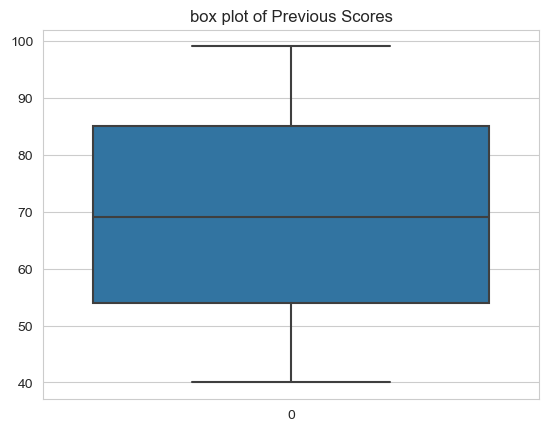

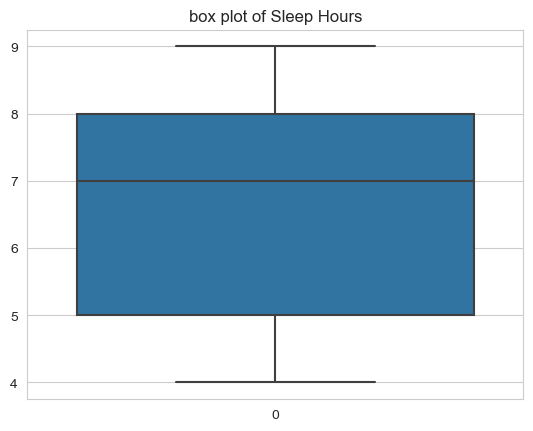

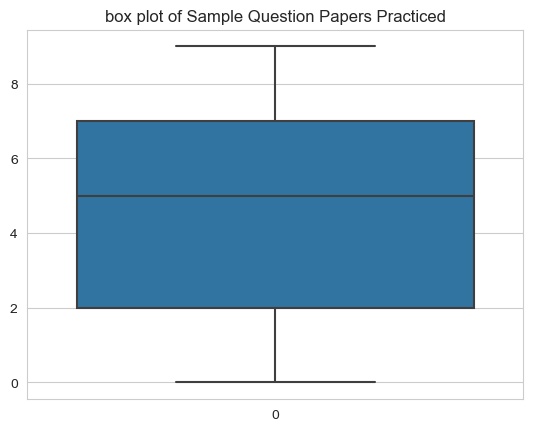

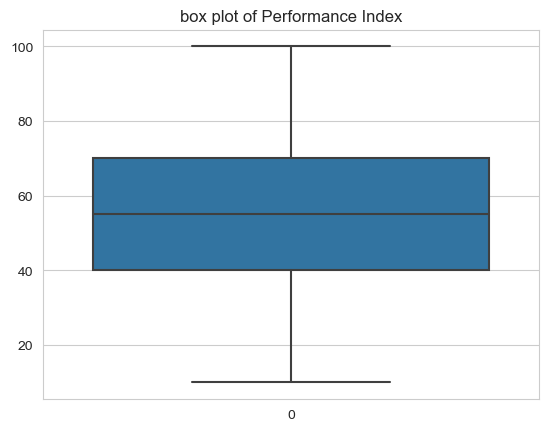

In [10]:
#Checking for outliers using boxplot
num_data=data.drop(['Extracurricular Activities'], axis=1)

sns.set_style('whitegrid')
for column in num_data:
   sns.boxplot(data=num_data[column])
   plt.title(f'box plot of {column}')
   plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

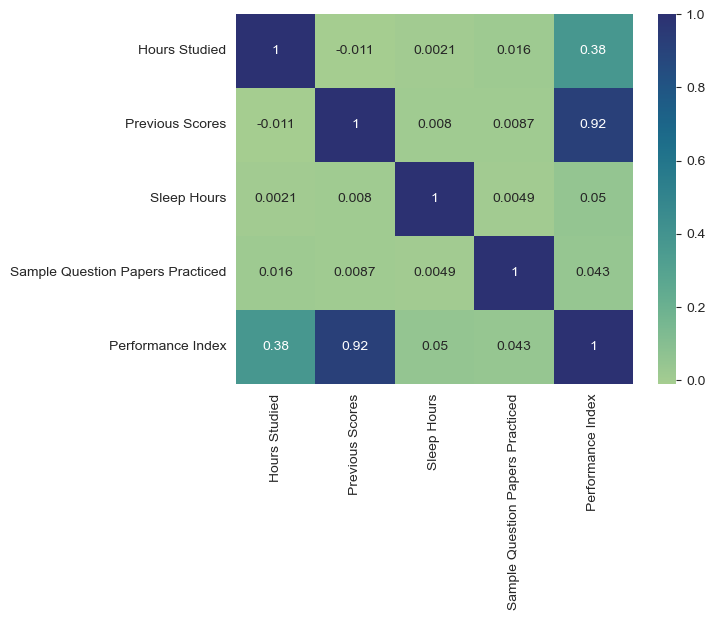

In [11]:
#Checking correlation of numerical columns and visualizing it with heatmaps
correlation=num_data.corr()

sns.heatmap(correlation, cmap='crest', annot=True)
plt.show

<AxesSubplot:xlabel='Performance Index', ylabel='Count'>

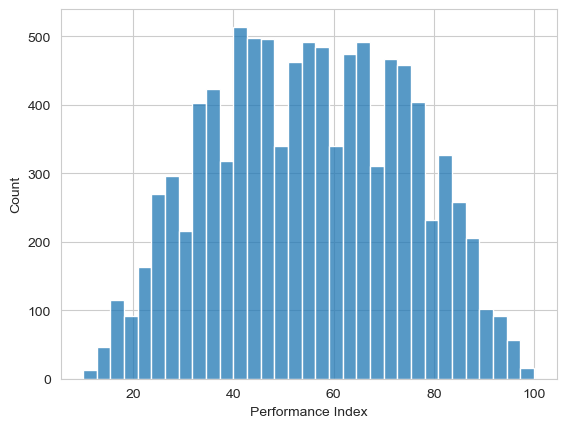

In [12]:
#Checking performance distribution
sns.histplot(data=data['Performance Index'])

## Working with the categorical variable

In [13]:
data.describe(include=object).T

,count,unique,top,freq
Extracurricular Activities,9873,2,No,4986


In [14]:
from sklearn.preprocessing import LabelEncoder

#Label encoding since it has only two unique values
le=LabelEncoder()
data['Extracurricular Activities']=le.fit_transform(data['Extracurricular Activities'])
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Data splitting, scaling and Model Selection

In [15]:
#Separating the independent variables(x) and dependent variable(y)
x=data.drop(['Performance Index'],axis=1)
y=data['Performance Index']

In [21]:
#Splitting the training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns = x_test.columns)

In [23]:
#Setting and fitting the model(LinearRegression)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
#Testing the model with the test data
prediction=model.predict(x_test)

## Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

#using r_squared method
r_res = r2_score(y_test, prediction)
r_res

0.9874242755534216

In [26]:
#using mean squared error
res = mean_squared_error(y_test, prediction)
res

4.68024113849271